# Random forest cross-validation

Run cross validation by station (leave-one out)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneGroupOut

import xgboost as xgb

In [2]:
dat = pd.read_csv("./rbfs/phi_short_reduce.csv")
dat.head()
#X = np.load("./rbfs/phi_reduce.npy")
#y = np.load("./rbfs/y.npy")

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,210,211,212,213,214,215,216,y,site,date
0,0,1.000000,0.933712,0.760067,0.539408,0.333740,0.180022,0.084658,0.034709,0.012406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031,2005,2023-01-08
1,1,0.999728,0.941552,0.773095,0.553410,0.345372,0.187912,0.089135,0.036861,0.013290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032,2005,2023-01-08
2,2,0.998914,0.948942,0.785919,0.567468,0.357216,0.196041,0.093797,0.039125,0.014228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030,2005,2023-01-08
3,3,0.997558,0.955871,0.798521,0.581567,0.369266,0.204411,0.098650,0.041506,0.015225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031,2005,2023-01-08
4,4,0.995663,0.962327,0.810885,0.595692,0.381514,0.213022,0.103697,0.044008,0.016283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031,2005,2023-01-08


In [3]:
dat2 = dat[dat['date'] == "2023-01-01"]
dat2.shape

(0, 221)

In [4]:
dat2 = dat2.groupby('site')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


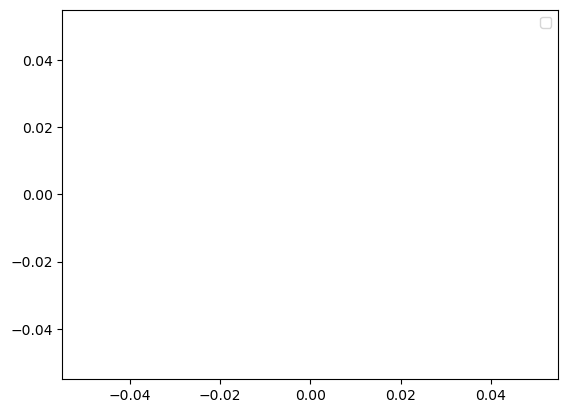

In [5]:
# Plot
fig, ax = plt.subplots()

ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in dat2:
    ax.plot(group.y, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [6]:
X = dat.iloc[:, 1:218]
y = dat['y']
groups = dat['site']
logo = LeaveOneGroupOut()
logo.get_n_splits(X, y, groups)

8

In [7]:
mygrps = groups.unique()
n_grps = len(mygrps)

## Cross-validation loop

In [8]:
my_mae = np.empty(n_grps)
my_y_true = []
my_y_pred = []

In [9]:
for i, (train_index, test_index) in enumerate(logo.split(X, y, groups)):
    print(f"Fold {i}:")
    print(f"Site {mygrps[i]}:")
    #print(f"  Train: index={train_index}, group={groups[train_index]}")
    #print(f"  Test:  index={test_index}, group={groups[test_index]}")

    # Split out data
    X_train = X.iloc[train_index, :]
    print(X_train.shape)
    y_train = y[train_index]
    n_feat = X_train.shape[1]
    
    X_test = X.iloc[test_index, :]
    print(X_test.shape)
    y_test = y[test_index]

    # Build model
    xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

    # Train model
    aq_xgb = xgb_model.fit(X_train, y_train)
    
    ## Predict for test set
    y_test_pred = aq_xgb.predict(X_test)
    my_mae[i] = mean_absolute_error(y_test, y_test_pred)
    print(f"MAE: {my_mae[i]}")
    
    my_y_true.append(y_test.to_numpy())
    my_y_pred.append(y_test_pred)


/Users/u0784726/miniforge3/envs/dk/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [14:36:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1703076401032/work/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Fold 0:
Site 2005:
(1002, 217)
(142, 217)


/Users/u0784726/miniforge3/envs/dk/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [14:36:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1703076401032/work/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAE: 0.005006178985061256
Fold 1:
Site 3006:
(1001, 217)
(143, 217)
MAE: 0.0050387379859990955
Fold 2:
Site 3010:
(1001, 217)
(143, 217)


/Users/u0784726/miniforge3/envs/dk/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [14:36:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1703076401032/work/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/Users/u0784726/miniforge3/envs/dk/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [14:36:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1703076401032/work/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAE: 0.00456551335113835
Fold 3:
Site 3013:
(1000, 217)
(144, 217)
MAE: 0.010670439747912396
Fold 4:
Site 3014:
(1000, 217)
(144, 217)


/Users/u0784726/miniforge3/envs/dk/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [14:36:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1703076401032/work/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/Users/u0784726/miniforge3/envs/dk/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [14:36:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1703076401032/work/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAE: 0.005295773476998572
Fold 5:
Site 3015:
(1000, 217)
(144, 217)
MAE: 0.003006412305244542
Fold 6:
Site 3016:
(1003, 217)
(141, 217)


/Users/u0784726/miniforge3/envs/dk/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [14:36:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1703076401032/work/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


MAE: 0.007162273585261341
Fold 7:
Site 4002:
(1001, 217)
(143, 217)
MAE: 0.004736335874225788


/Users/u0784726/miniforge3/envs/dk/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [14:36:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1703076401032/work/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [14]:
print(my_mae)
print(np.mean(my_mae))


[0.00500618 0.00503874 0.00456551 0.01067044 0.00529577 0.00300641
 0.00716227 0.00473634]
0.005685208163980168


In [10]:
my_y_pred

[array([0.02020307, 0.02492961, 0.02796407, 0.02775526, 0.02705348,
        0.03135558, 0.03135558, 0.03075458, 0.03177277, 0.03202086,
        0.03157493, 0.03206505, 0.03182792, 0.032079  , 0.03156902,
        0.03251785, 0.03238606, 0.02930691, 0.02832411, 0.02341545,
        0.00775336, 0.0071405 , 0.00297648, 0.00218521, 0.00199812,
        0.00225905, 0.00139385, 0.00583774, 0.00991294, 0.01453674,
        0.01384121, 0.0155441 , 0.01992082, 0.02383242, 0.02551353,
        0.03033522, 0.0308511 , 0.02973004, 0.02942643, 0.02763483,
        0.02816352, 0.02847414, 0.02864059, 0.0282784 , 0.0281363 ,
        0.0282784 , 0.02831246, 0.02831246, 0.02760096, 0.02828478,
        0.02817144, 0.02748762, 0.02853964, 0.02696612, 0.02662809,
        0.02424193, 0.01644334, 0.01625404, 0.01802165, 0.02544679,
        0.0255631 , 0.02234118, 0.02234118, 0.02460093, 0.02620726,
        0.02789458, 0.03161367, 0.02992766, 0.02668687, 0.0188698 ,
        0.01765678, 0.01777199, 0.02067255, 0.02

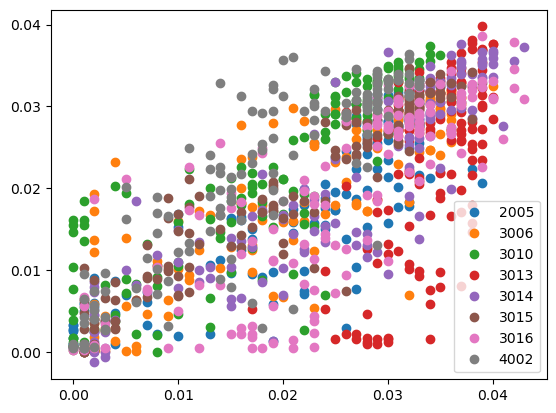

In [11]:
plt.figure()
for i in range(len(mygrps)):
    plt.plot(my_y_true[i], my_y_pred[i], 'o', label = mygrps[i])

plt.legend()
plt.show()

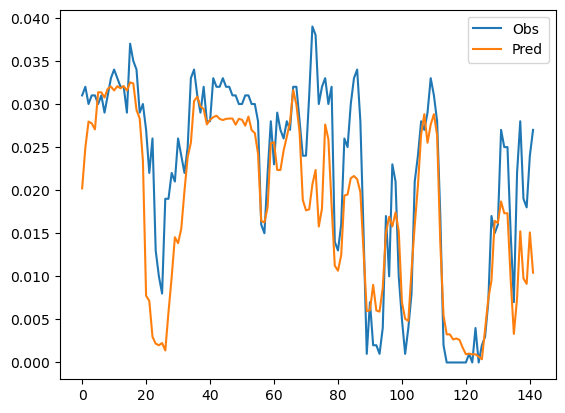

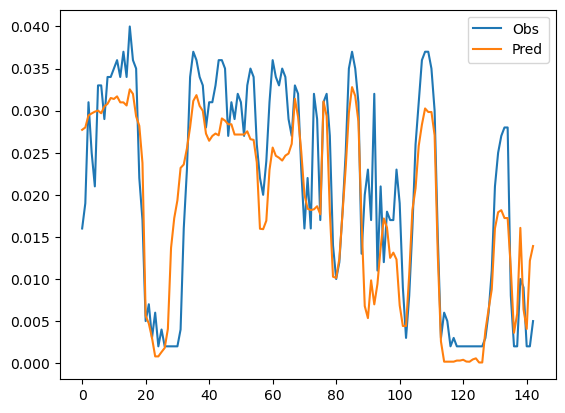

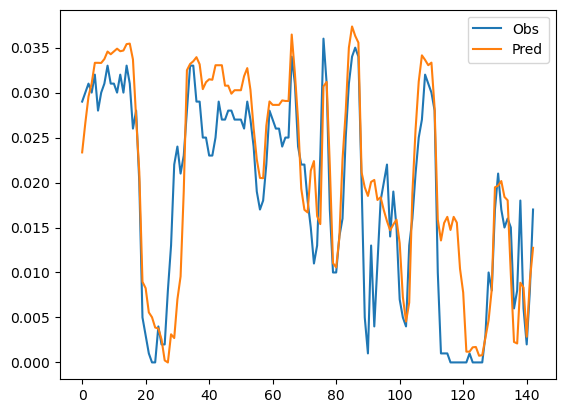

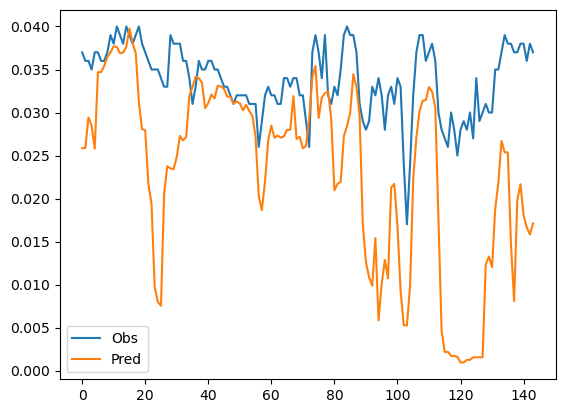

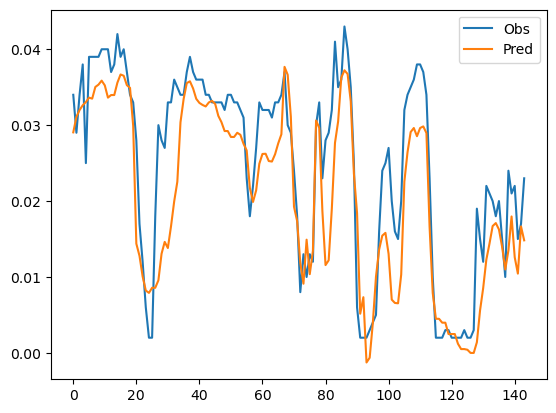

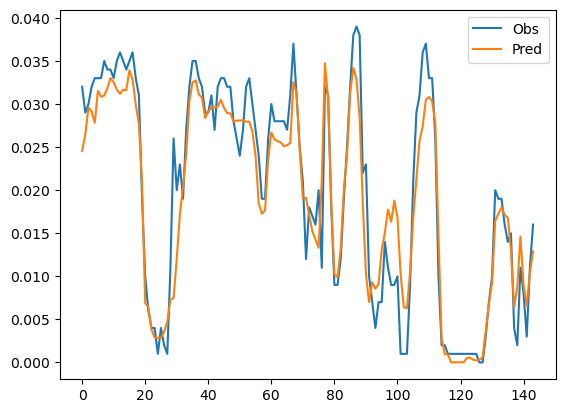

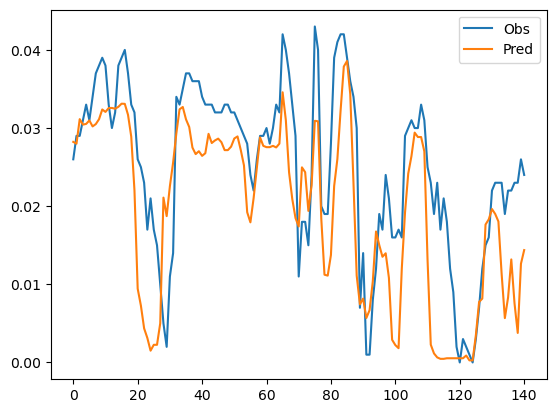

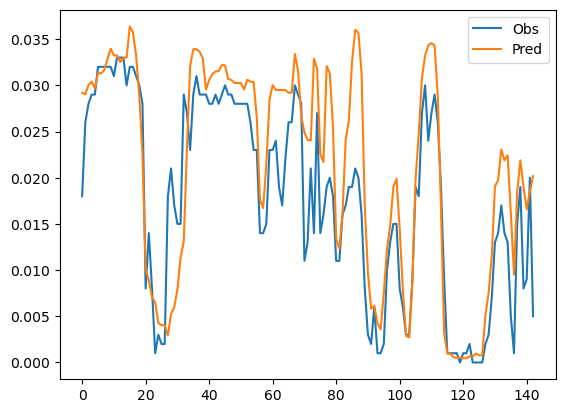

In [12]:
for i in range(len(mygrps)):
    plt.plot(my_y_true[i], label = "Obs")
    plt.plot(my_y_pred[i], label = "Pred")
    plt.legend()
    plt.show()